# 1. Preliminary Data Analysis

## 1.1 Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


## 1.2 Dataset

In [2]:
df=pd.read_csv(r"D:\AdultCensusIncomePrediction\notebooks\data\adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. We can observe that _**education-num**_ and _**education**_ are the same variables with different data types. We can drop any one of them.
2. We have _**categorical**_ and _**numerical variables**_.

## 1.3 Columns & thier Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We need to convert all variables to the _**same datatype**_ for classification.

## 1.3 Summary Statistics

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. There's _**no missing data**_ as all counts are same.
2. There is _**presence of outliers**_ in the dataset in various columns.
3. There data has _**skewness**_ too.

## 1.4 Distinct column values

In [6]:
for i in df.columns:
    print(i,":\n",df[i].unique())

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302]
education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming

We can observe that the _**workclass**_,_**occupation**_ & _**country**_ column has _**'?'**_ values which _**means none**_.

### 1.4.1 Amount of wrong column values in the dataset.

In [7]:
for i,j in zip(df.columns,(df.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 1836 records
occupation: 1843 records
country: 583 records


### 1.4.2 Visualizing each column to make fill in the correct values.

#### 1.4.2.1 Workclass

<AxesSubplot:xlabel='workclass', ylabel='Count'>

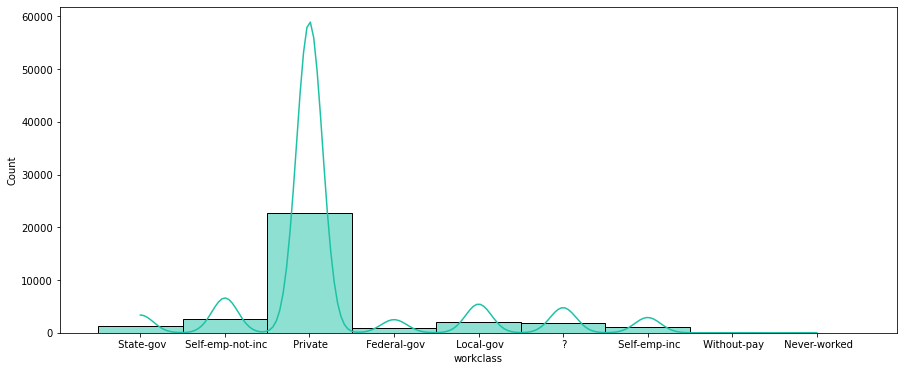

In [8]:
plt.figure(figsize=(15,6))
sns.histplot(data=df['workclass'], x=df['workclass'], element="bars",kde=True, color="#1dc2a6")

1. The dominant values are only of _**Private Sector**_.
2. _**?**_ does not have signifacnt values or contribution ot the dataset.

#### 1.4.2.2 Country

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


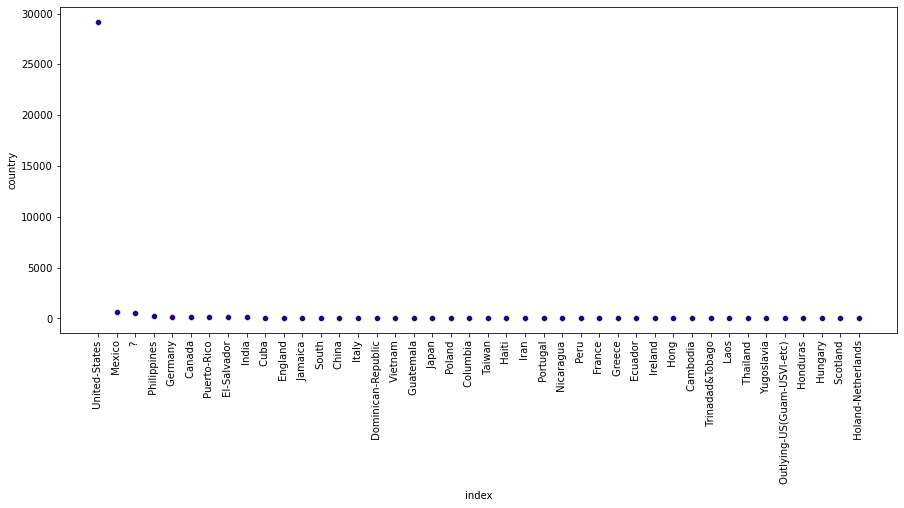

In [9]:
plt.figure(figsize=(15,6))
df_con=pd.DataFrame(data=df["country"].value_counts())
df_con=df_con.reset_index()
g=sns.scatterplot(data=df["country"], y=df_con["country"], x=df_con["index"],color="#250180")
g.set_xticklabels(
    labels=df_con["index"], rotation=90)
# Show the plot
plt.show()

1. The dominant values are only of _**United-States**_.
2. _**?**_ does not have signifacnt values or contribution ot the dataset.

#### 1.4.2.3 Occupation

<AxesSubplot:xlabel='occupation', ylabel='index'>

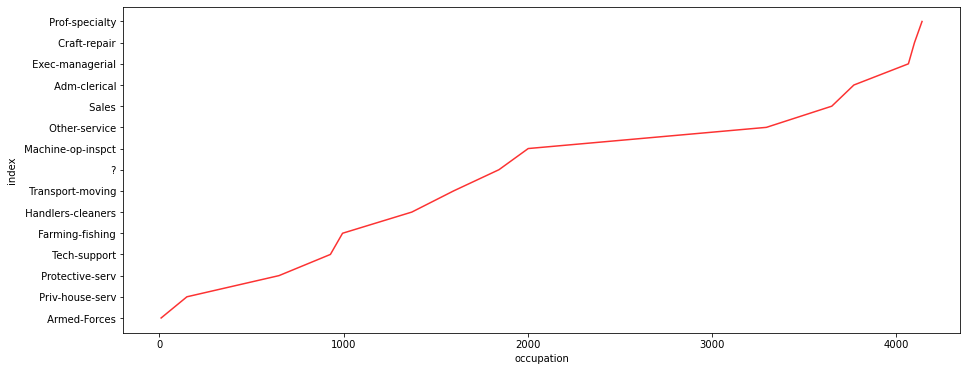

In [10]:
for i in ["occupation"]:
    plt.figure(figsize=(15,6))
    df_con=pd.DataFrame(data=df[i].value_counts())
    df_con=df_con.reset_index()
sns.lineplot(data=df_con["occupation"], x=df_con["occupation"], y=df_con["index"],color="#fc3232")

All the sectors have significant values therefore we need to disrtibute the _**?**_ values.

##### Replacing the _**?**_ values with the _**mode**_ of the column.

<AxesSubplot:xlabel='occupation', ylabel='index'>

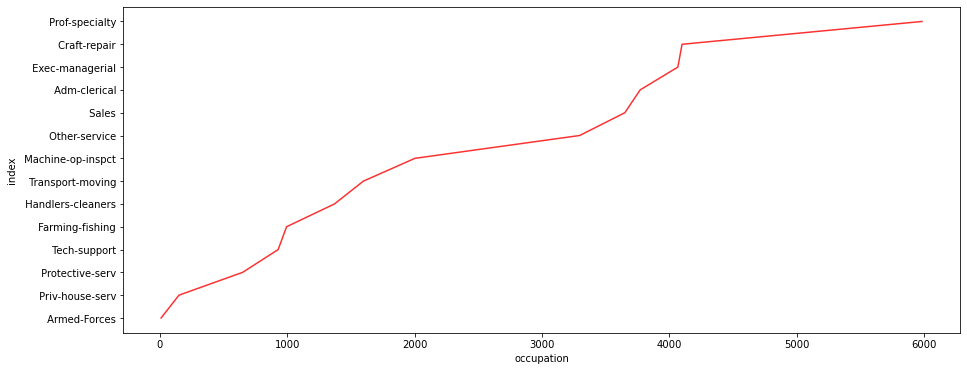

In [11]:
df["occupation"] = df["occupation"].replace(' ?', np.nan)
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])
for i in ["occupation"]:
    plt.figure(figsize=(15,6))
    df_con=pd.DataFrame(data=df[i].value_counts())
    df_con=df_con.reset_index()
sns.lineplot(data=df_con["occupation"], x=df_con["occupation"], y=df_con["index"],color="#fc3232")

The issue has been resolved and we get the clean dataset without any missing values.

# 2.Exploratory Data Analysis

## 2.1 Visualizing left out categorical columns.

### 2.1.1 Race

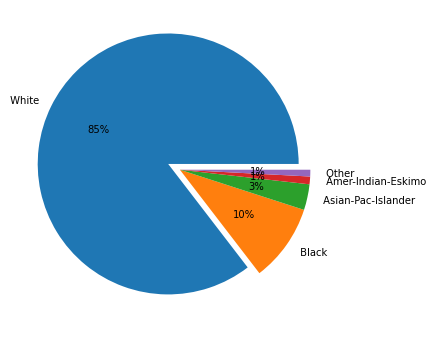

In [12]:
plt.figure(figsize=(10,6))
df_con=pd.DataFrame(data=df["race"].value_counts())
df_con=df_con.reset_index()
plt.pie(df_con["race"], labels=df_con["index"],explode=[0.1,0.0,0.0,0.0,0.0],autopct='%1.0f%%')
plt.show()

We infer that the max _**race**_ value is _**white**_ therefore it can be grouped into _**white**_ and _**non-whites**_.

### 2.1.2 Hours per week

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

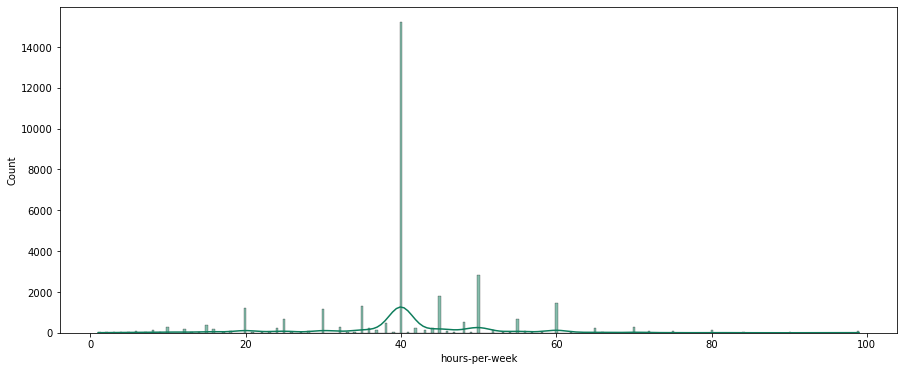

In [13]:
plt.figure(figsize=(15,6))
sns.histplot(data=df['hours-per-week'], x=df['hours-per-week'], element="bars",kde=True, color="#0e7d5c")

We infer that the max _**hours-per-week value**_ is _**40**_ therefore it can be grouped into _**<=40**_ and _**>40**_.

Also,from the above section we inferred that:
1. The max _**country**_ value is _**United-States**_ therefore it can be grouped into _**US**_ & _**Non-US**_.
2. The max _**workclass**_ value is _**Private**_ therefore it can be grouped into _**Private**_ & _**Non-Private**_.

## 2.2 Visualising relationships of all columns with salary.

### 2.2.1 Age & Salary

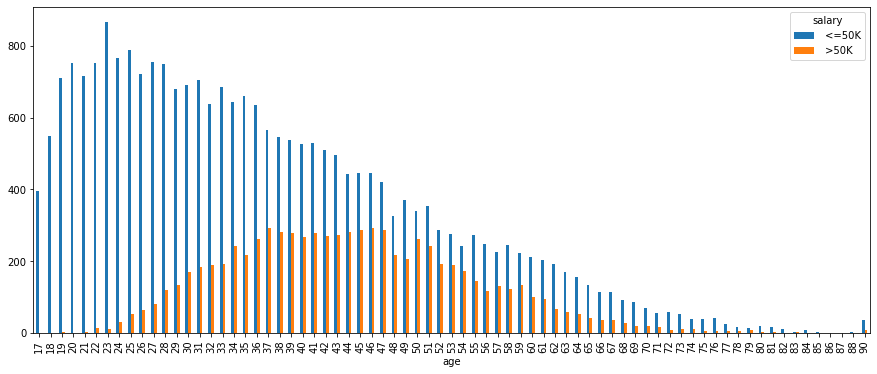

In [14]:
crosstb = pd.crosstab(df.age, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

1. We infer that _**min salary**_ of most of the population is in their _**20's**_ which is a valid as it is the starting time of a career
2. _**Age**_ and _**Salary**_ are in _**direct proportion**_ with each other.
3. The data is _**left skewed**_ as there are a very few people who work after 60's,therefore,the chances of salary being more than 50k is very less.

### 2.2.2 Workclass & Salary

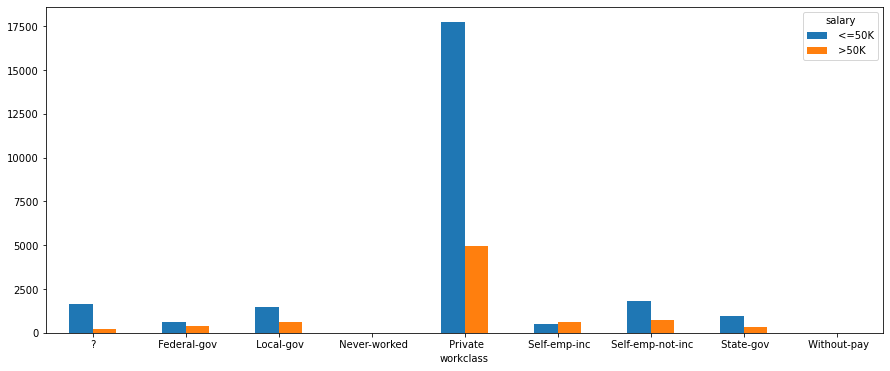

In [15]:
crosstb = pd.crosstab(df.workclass, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. We infer that _**salary**_ of most of the population be it <= or > 50k is occupied by the _**Private**_ sector.
2. Only a very few people belonging to private sector have a salary >50k, but it is still more than the sum total of all other sectors recieving salary >50k.
3. A _**self-employed**_ person that is a buisnessman has slighlty more chances of getting _**>50k**_ salary.

### 2.2.3 Education & Salary

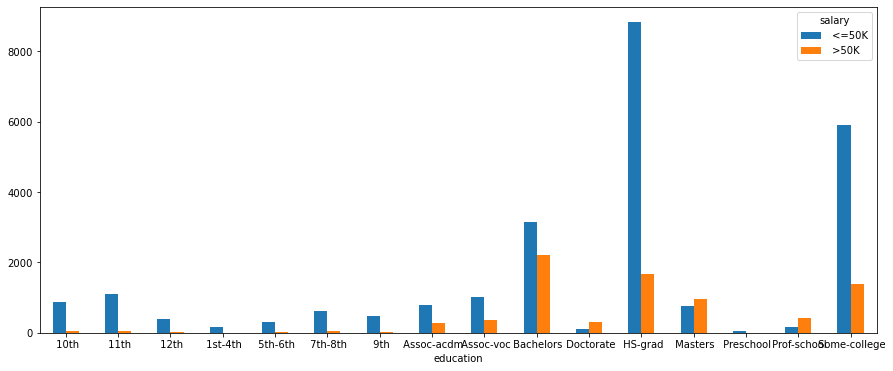

In [16]:
crosstb = pd.crosstab(df.education, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

We infer that the population is broadly divided into three groups:
1. _**Bachelors**_: A person having a bachelors degree has _**60:40**_ chances of getting _**<= or > 50 k**_ salary.
2. _**HS-grad**_: A person being a highschool graduate has _**95:05**_ chances of getting _**<= or > 50 k**_ salary. As most of the population is concentrated in highschool passout this reflects that most of the people do not cotinue their studies after school.
3. _**Some-college**_: A person attended a college but has no degree is certainly likely to have  _**75:25**_ chances of getting _**<= or > 50 k**_ salary. Surprisingly their are good number of people in this category which is a huge liability to the county and the person itself as they're not getting jobs according to their capabilites.

Another noticable thing is that only a very few pople complete their masters but one with that degree have a _**45:55**_ chance of getting _**<= or > 50 k**_ salary.

### 2.2.4 Marital Status & Salary

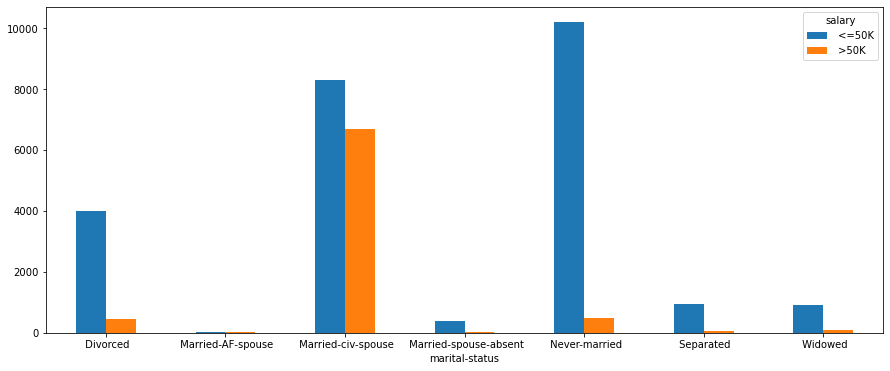

In [17]:
crosstb = pd.crosstab(df["marital-status"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

We infer that the population is broadly divided into three groups:
1. _**Divorced**_: A divorced person has _**90:10**_ chances of getting _**<= or > 50 k**_ salary.
2. _**Married-civ-spouse**_: A person married to a civillian spouse has _**53:47**_ chances of getting _**<= or > 50 k**_ salary. People in this domain are almost equal in number.
3. _**Never-married**_: A person who has never married has _**95:05**_ chances of getting _**<= or > 50 k**_ salary. Most of the population is concentrated in this domain.
​
Another noticable thing is that people who marry a spouse in armed forcues have and equal chance of getting _**<= or > 50 k**_ salary.

### 2.2.5 Occupation & Salary

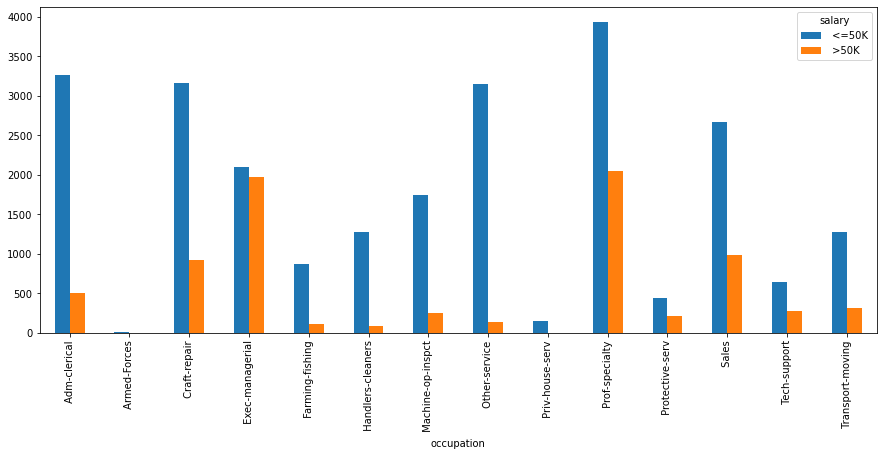

In [18]:
crosstb = pd.crosstab(df.occupation, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

1. Population is distributed in all of the occupational fields with _**minimum in armed forces**_ & _**maximum in prof-speciality**_.
2. Being in an _**executive managerial**_ position gives almost equal chances of getiing a _**<= or > 50k**_ salary.

### 2.2.6 Relationship & Salary

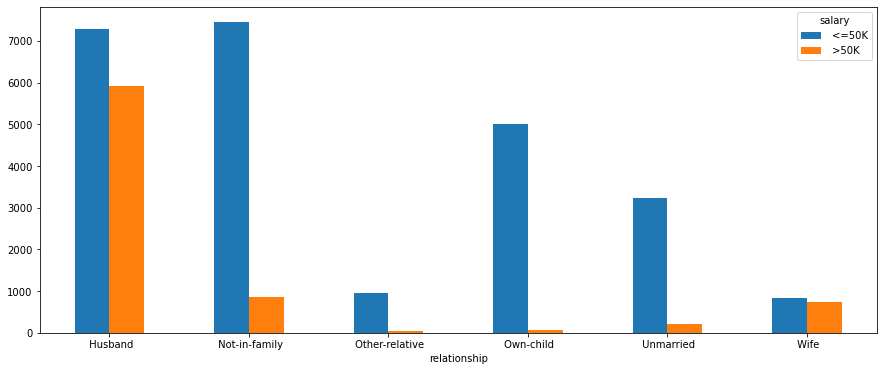

In [19]:
crosstb = pd.crosstab(df.relationship, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the people who are earning lie in the category of _**husbands**_. They have a _**55:45**_ chances of getting _**<= or > 50 k**_ salary.
2. A person being an earning _**wife**_ has equal chances of getting _**<= or > 50 k**_ salary.

### 2.2.7 Race & Salary

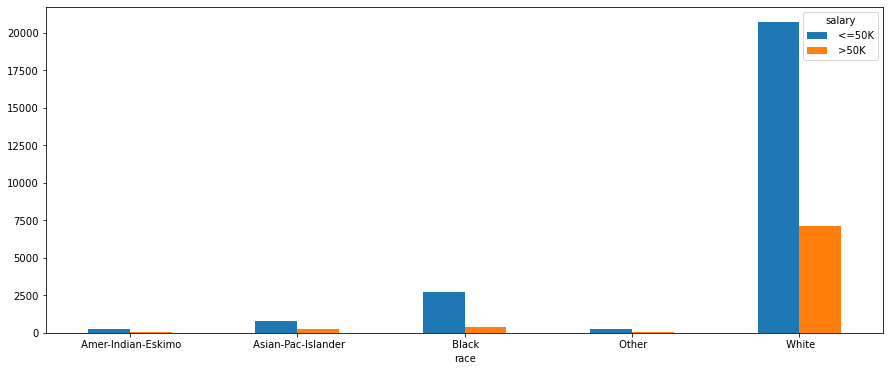

In [20]:
crosstb = pd.crosstab(df.race, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

Most of the population is _**white**_ and has _**75:25**_ chance of getting _**<= or > 50 k**_ salary.

### 2.2.8 Gender & Salary

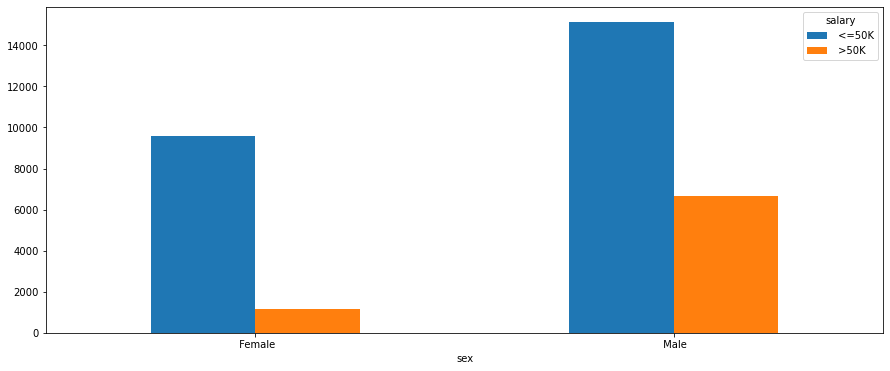

In [21]:
crosstb = pd.crosstab(df.sex, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the earning populations is male and has _**70:30**_ chance of getting _**<= or > 50 k**_ salary.
2. Females have _**90:10**_ chance of getting _**<= or > 50 k**_ salary.

Gender discrimination can clearly be seen.

### 2.2.9 Country & Salary

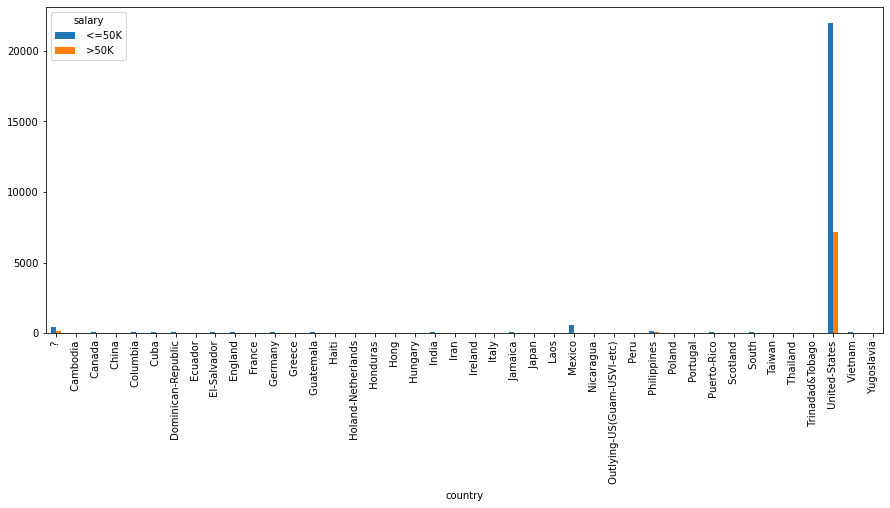

In [22]:
crosstb = pd.crosstab(df.country, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

The only country having max population is United-States where _**75:25**_ is the chance of getting _**<= or > 50 k**_ salary.

### 2.2.10 Hours Per Week & Salary

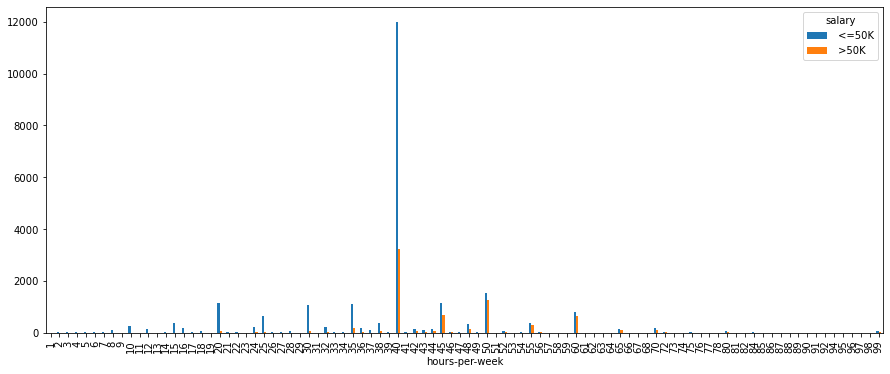

In [23]:
crosstb = pd.crosstab(df["hours-per-week"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize=(15,6))
plt.xticks(rotation = 90)
plt.show()

Most of the people work for 40 hours per week & have _**77:35**_  chance of getting _**<= or > 50 k**_ salary.

### 2.2.11 Education number,Race & Salary

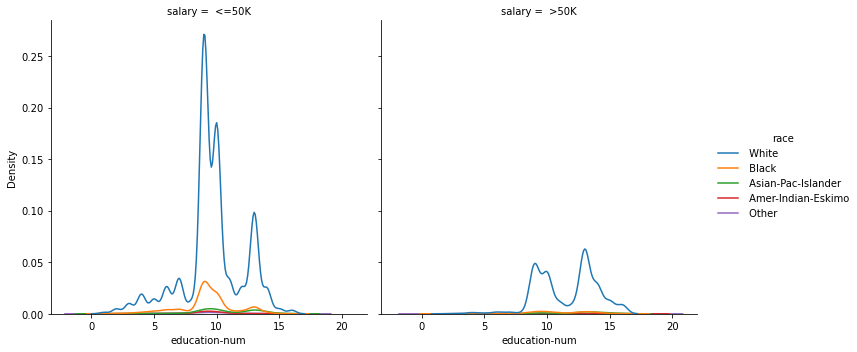

In [24]:
sns.displot(data=df, x=df["education-num"], hue=df["race"], col=df["salary"], kind="kde")

1. Most of the people who are _**white**_ recieve education for around _**9 years**_ and get a salary of _**<=50 k**_.
2. Very few _**white**_ people seem to get education for around _**13 years**_ and recieve a salary of _**>50 k**_.
3. All _**other races**_ do _**not**_ get that _**much education**_ and therefore have low salary.

### 2.2.12 Hours per week,relationship & Salary

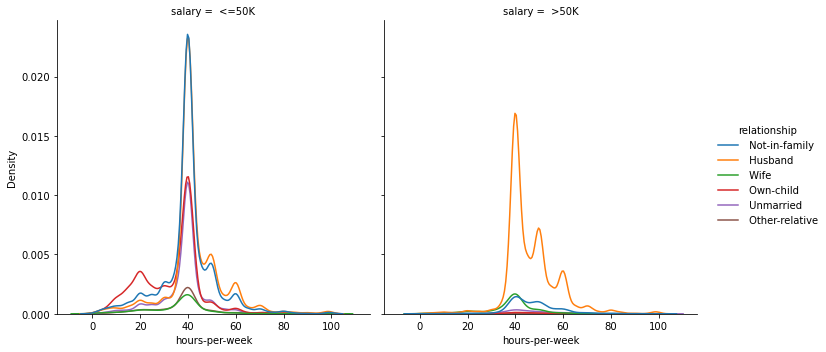

In [25]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["relationship"], col=df["salary"], kind="kde")

1. Most of the people who are _**not in family**_ work for around _**40 hours per week**_ and get a salary of _**<=50 k**_.
2. People who have a relationship of _**husband**_ work for around _**40 hours per week**_ and recieve a salary of _**>50 k**_.

## **Summary**
_For getting salary >50k one must lie in the following categories:_
* **Age** : 40-55
* **Workclass** : Private/Self-Employed
* **Education** : Bachelors/Masters
* **Marital Status** : Married-civ-spouse
* **Occupation** : Exec-manager
* **Relationship** : Husband/wife
* **Race** : White
* **Gender** : Male
* **Country** : United-States
* **Hours per week** : >40

# 3. Data pre-processing

## 3.1 Grouping and encoding all the categorical columns.

In [26]:
for dataset in [df]:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 0
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 1
    dataset.loc[dataset['race'] != ' White', 'race'] = 0
    dataset.loc[dataset['race'] == ' White', 'race'] = 1
    dataset.loc[dataset['workclass'] != ' Private', 'workclass'] = 0
    dataset.loc[dataset['workclass'] == ' Private', 'workclass'] = 1
    dataset.loc[dataset['hours-per-week'] <= 40, 'hours-per-week'] = 0
    dataset.loc[dataset['hours-per-week'] > 40, 'hours-per-week'] = 1
for col in df[df.columns]:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df = df.astype(int)
df=df.drop(["education"],axis=1)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,13,4,0,1,1,1,2174,0,0,1,0
1,50,0,83311,13,2,3,0,1,1,0,0,0,1,0
2,38,1,215646,9,0,5,1,1,1,0,0,0,1,0
3,53,1,234721,7,2,5,0,0,1,0,0,0,1,0
4,28,1,338409,13,2,9,5,0,0,0,0,0,0,0


We dropped the _**education**_ column because it is same as _**education-num**_.

## 3.2 Plotting graphs for numerical columns.

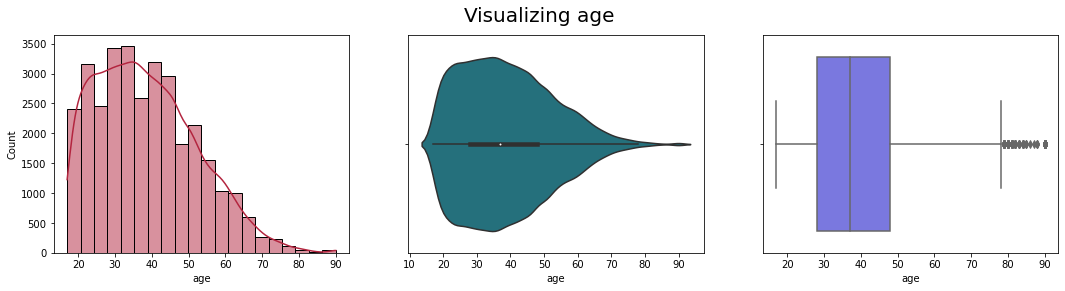

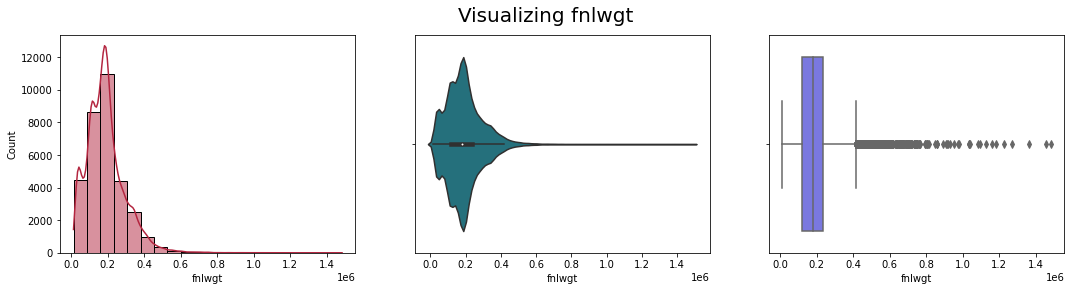

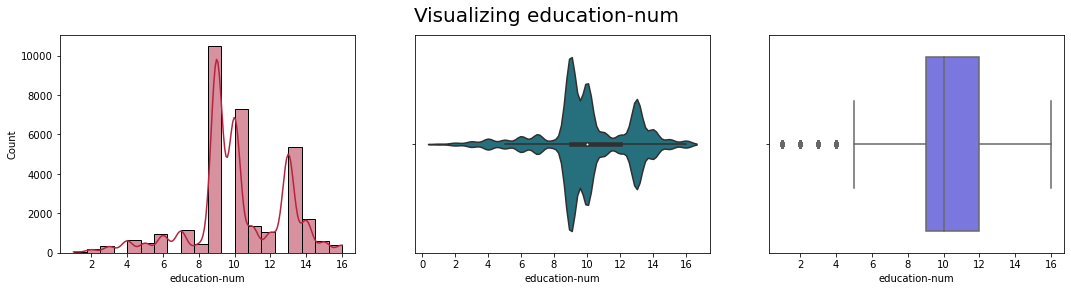

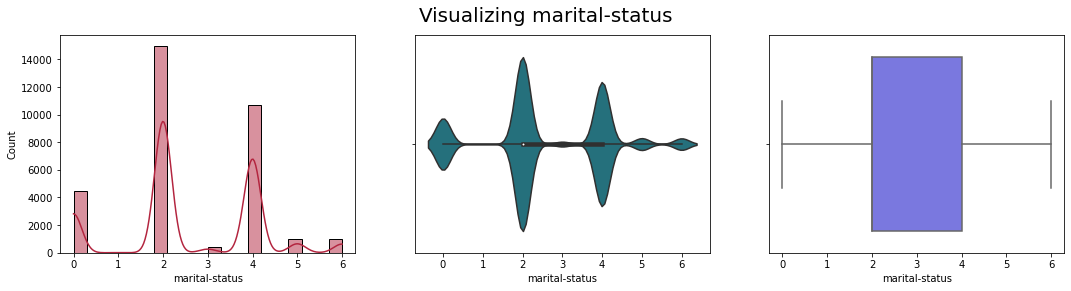

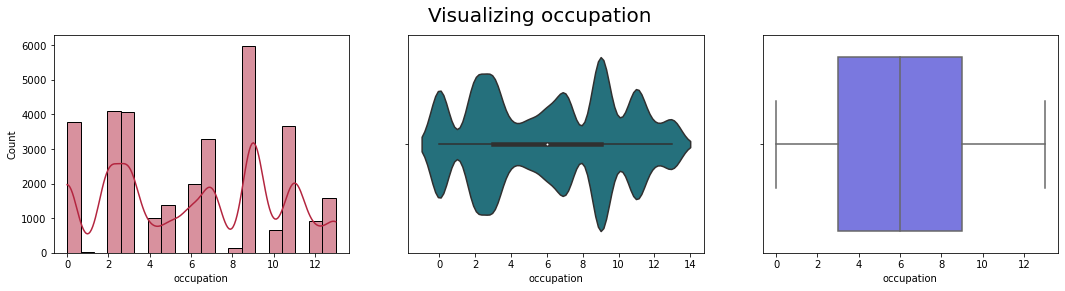

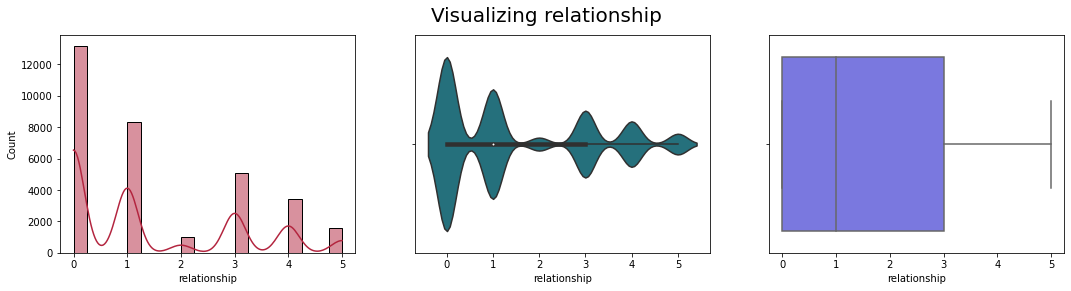

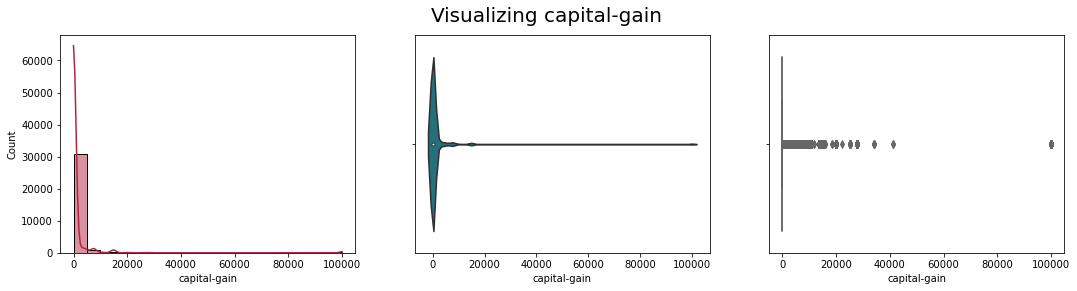

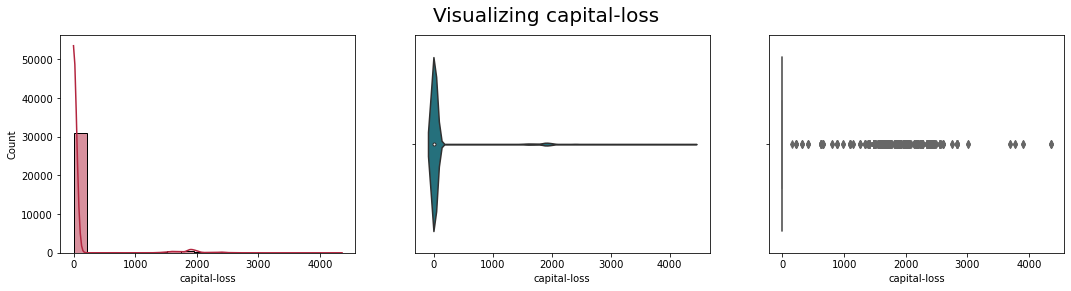

In [27]:
df1=df.drop(["workclass","country","race","sex","salary","hours-per-week"],axis=1)
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

**Left-Skewed Data:**
1. Age
2. Fnlwgt

**Outliers:**
1. Fnlwgt
2. Education-num
3. Capital-gain
4. Capital-loss

In [3]:
df['capital_gain']=df['capital-gain']
df['marital_status']=df['marital-status']
df['capital_loss']=df['capital-loss']
df['hours_per_week']=df['hours-per-week']

In [4]:
df.drop(['capital-gain','marital-status','capital-loss','hours-per-week'],axis=1,inplace=True)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,country,salary,capital_gain,marital_status,capital_loss,hours_per_week
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,2174,Never-married,0,40
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Husband,White,Male,United-States,<=50K,0,Married-civ-spouse,0,13
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0,Divorced,0,40
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0,Married-civ-spouse,0,40
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0,Married-civ-spouse,0,40


In [7]:
df.to_csv(r'D:\AdultCensusIncomePrediction\notebooks\data\filter_data.csv')